In [1]:
import os
from datetime import datetime
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio.Seq import Seq
from processing import load_results, generate_summary_stats
from processing import plot_cer, plot_cer_confidence_interval, plot_fuzzy_match, plot_close_matches
from processing import process_oboes

# Load predictions

In [2]:
filenames = list(Path('predictions/bayes_tuner_1-transfer_learned').glob('*.csv'))
models, results = load_results(filenames)
summary_results = generate_summary_stats(models, results)
print([a[1] for a in models])
results.head()

['bayes_best_8_19-combo-fine_tuned-predictions', 'bayes_best_8_19-combo-retrained-predictions', 'bayes_best_8_19-standley-fine_tuned-predictions', 'bayes_best_8_19-standley-retrained-predictions', 'bayes_best_8_19-steyermark-fine_tuned-predictions', 'bayes_best_8_19-steyermark-retrained-predictions']


,bayes_best_8_19-steyermark-fine_tuned-predictions-ground_truth,bayes_best_8_19-steyermark-fine_tuned-predictions,bayes_best_8_19-steyermark-retrained-predictions-ground_truth,bayes_best_8_19-steyermark-retrained-predictions,bayes_best_8_19-standley-fine_tuned-predictions-ground_truth,bayes_best_8_19-standley-fine_tuned-predictions,bayes_best_8_19-combo-fine_tuned-predictions-ground_truth,bayes_best_8_19-combo-fine_tuned-predictions,bayes_best_8_19-standley-retrained-predictions-ground_truth,bayes_best_8_19-standley-retrained-predictions,...,bayes_best_8_19-steyermark-fine_tuned-predictions match ratio insensitive,bayes_best_8_19-steyermark-fine_tuned-predictions CER no punc,bayes_best_8_19-steyermark-fine_tuned-predictions match ratio no punc,bayes_best_8_19-steyermark-retrained-predictions CER,bayes_best_8_19-steyermark-retrained-predictions match ratio,bayes_best_8_19-steyermark-retrained-predictions-edit_distance,bayes_best_8_19-steyermark-retrained-predictions CER insensitive,bayes_best_8_19-steyermark-retrained-predictions match ratio insensitive,bayes_best_8_19-steyermark-retrained-predictions CER no punc,bayes_best_8_19-steyermark-retrained-predictions match ratio no punc
0,Polk Co.,Aeris,Polk Co.,Aotirn,.),.),.),.),.),b,...,0.0,100.000000,0.0,85.714286,14.0,7.0,85.714286,14.0,85.714286,14.0
1,July,Joter,July,wates,Maxon,am,Maxon,iar,Maxon,mormn,...,22.0,100.000000,22.0,125.000000,0.0,5.0,125.000000,0.0,125.000000,0.0
2,1937,nis,1937,basg,delitescens,Cirons,delitescens,celcicansa,delitescens,Poctone,...,0.0,92.857143,0.0,95.238095,0.0,4.0,95.238095,0.0,95.238095,0.0
3,.),1,.),thr,radicans,idinn,radicans,lidoan,radicans,licteme,...,0.0,NaN,NaN,300.000000,0.0,3.0,300.000000,0.0,NaN,NaN
4,on,in,on,io,Damp,Mw,Damp,in,Damp,bom,...,50.0,50.000000,50.0,100.000000,50.0,2.0,100.000000,50.0,100.000000,50.0


# View summary stats

In [3]:
summary_results[[('CER', 'mean'), ('CER_insensitive', 'mean'), ('CER_nopunc', 'mean'), 
                       ('matchratio', 'mean'), ('matchratio_insensitive', 'mean'), ('matchratio_nopunc', 'mean')]]

stat,CER,CER_insensitive,CER_nopunc,matchratio,matchratio_insensitive,matchratio_nopunc
substats,mean,mean,mean,mean,mean,mean
bayes_best_8_19-combo-fine_tuned-predictions,82.564744,82.564744,81.17101,26.459239,27.647645,28.032772
bayes_best_8_19-combo-retrained-predictions,94.556694,94.556694,93.526269,17.034568,18.120988,19.90407
bayes_best_8_19-standley-fine_tuned-predictions,85.057448,85.057448,84.02813,26.069136,26.841975,26.615385
bayes_best_8_19-standley-retrained-predictions,99.412053,99.412053,98.375016,20.185185,21.597531,22.197403
bayes_best_8_19-steyermark-fine_tuned-predictions,84.855607,84.855607,84.006278,25.663805,26.476395,26.647399
bayes_best_8_19-steyermark-retrained-predictions,97.140453,97.140453,96.097199,17.135908,18.562232,19.119822


In [4]:
summary_results[['exact_matches', 'oboe_matches', 'cer_95_error_min', 'cer_95_error_max']]

stat,exact_matches,oboe_matches,cer_95_error_min,cer_95_error_max
substats,,,,
bayes_best_8_19-combo-fine_tuned-predictions,11.0,50.0,80.123480,85.006008
bayes_best_8_19-combo-retrained-predictions,0.0,3.0,91.375667,97.737721
bayes_best_8_19-standley-fine_tuned-predictions,2.0,14.0,81.580643,88.534254
bayes_best_8_19-standley-retrained-predictions,0.0,2.0,95.446692,103.377414
bayes_best_8_19-steyermark-fine_tuned-predictions,6.0,37.0,81.723391,87.987823
bayes_best_8_19-steyermark-retrained-predictions,0.0,7.0,94.626347,99.654559


# Display graphs

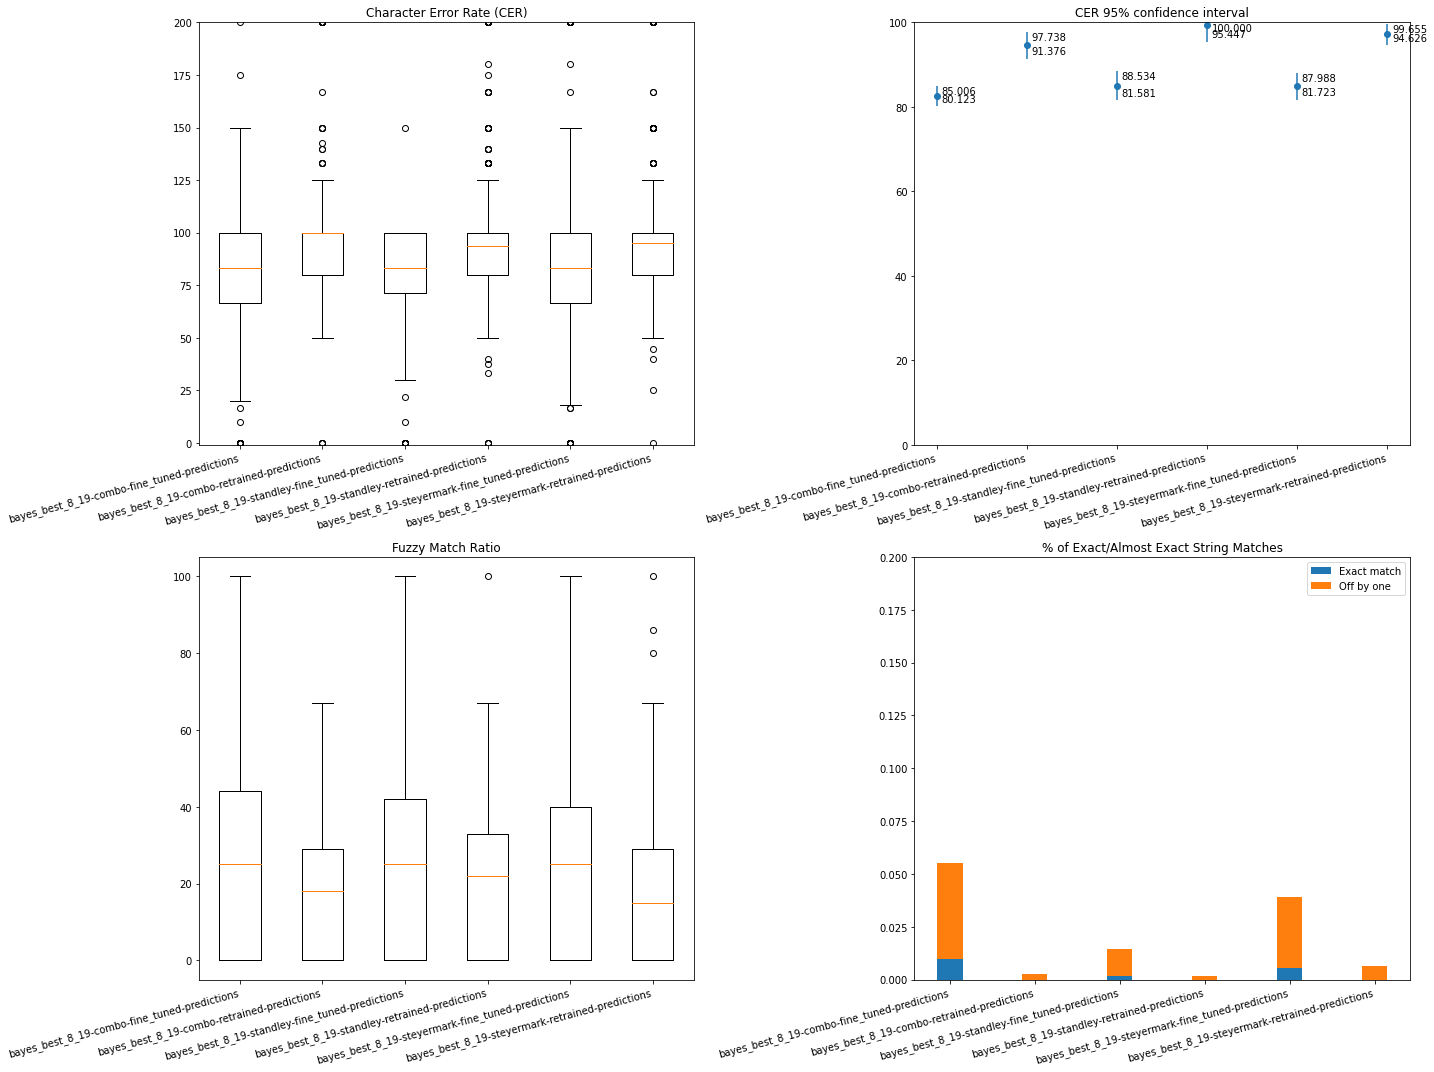

In [5]:
fig, ((graph1, graph2), (graph3, graph4)) = plt.subplots(2, 2, figsize=(20, 15))
# fig, graph1 = plt.subplots(1, 1, figsize=(10, 7))  # For saving individual charts

plot_cer(models, results, graph1)
plot_cer_confidence_interval(models, summary_results, graph2)
plot_fuzzy_match(models, results, graph3)
plot_close_matches(models, results, summary_results, graph4)
fig.tight_layout()

# OBO String Comparisons

In [6]:
plain_model_labels, substitution_errors, deletion_errors, insertion_errors = process_oboes(models, results)
display_model = plain_model_labels[0]

print(f'=========== {display_model} Summary: ===========')
print('Top 10 Substitutions:')
for key in list(substitution_errors[display_model])[:10]:
    print(f'{key}: {substitution_errors[display_model][key]}')
print('\nTop 10 Deletions:')
for key in list(deletion_errors[display_model])[:10]:
    print(f'{key}: {deletion_errors[display_model][key]}')
print('\nTop 10 Insertions:')
for key in list(insertion_errors[display_model])[:10]:
    print(f'{key}: {insertion_errors[display_model][key]}')

=========== bayes_best_8_19-combo-fine_tuned Summary: ===========
Top 10 Substitutions:
('6', '2'): 5
('f', 'p'): 2
('2', '1'): 2
('o', 'm'): 2
('3', '1'): 2
('.', '1'): 2
('w', 'n'): 1
('V', 'N'): 1
('8', '3'): 1
('5', '2'): 1

Top 10 Deletions:
o: 5
.: 4
f: 4
n: 4
): 2
0: 2
O: 2
d: 2
w: 2
1: 1

Top 10 Insertions:
.: 2
L: 1
a: 1
e: 1
': 0
 : 0
!: 0
": 0
#: 0
&: 0


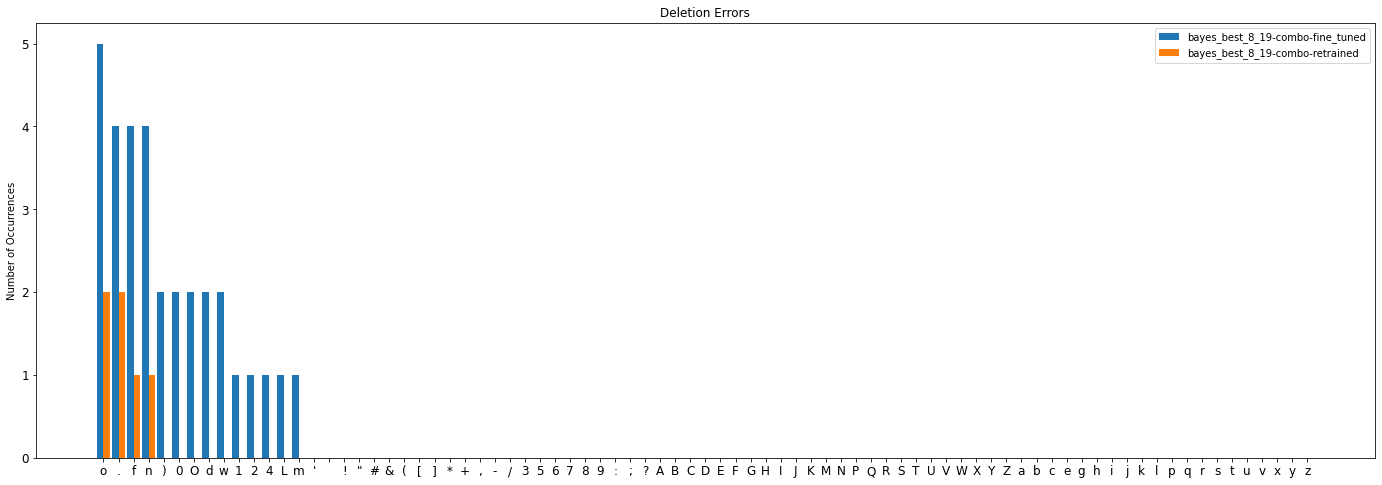

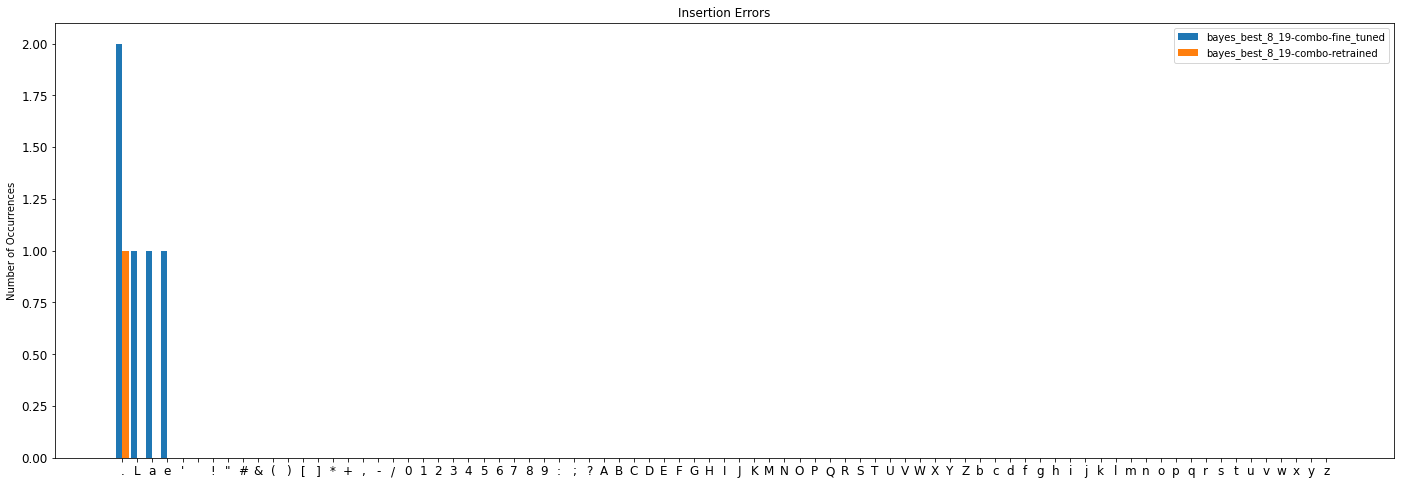

In [7]:
comparison_model = plain_model_labels[1]
plt.figure(figsize=(24, 8))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.bar(np.arange(len(deletion_errors[display_model].keys())) - 0.225, deletion_errors[display_model].values(), 0.45, label = display_model)
plt.bar(np.arange(len(deletion_errors[comparison_model].keys())) + 0.225, deletion_errors[comparison_model].values(), 0.45, label = comparison_model)
plt.xticks(np.arange(len(deletion_errors[display_model].keys())) , deletion_errors[display_model].keys())
plt.title("Deletion Errors")
plt.ylabel("Number of Occurrences")
plt.legend()
plt.show()

plt.figure(figsize=(24, 8))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.bar(np.arange(len(insertion_errors[display_model].keys())) - 0.225, insertion_errors[display_model].values(), 0.45, label = display_model)
plt.bar(np.arange(len(insertion_errors[comparison_model].keys())) + 0.225, insertion_errors[comparison_model].values(), 0.45, label = comparison_model)
plt.xticks(np.arange(len(insertion_errors[display_model].keys())) , insertion_errors[display_model].keys())
plt.title("Insertion Errors")
plt.ylabel("Number of Occurrences")
plt.legend()
plt.show()

In [ ]:
list_of_changes = []
for idx, (ground_truth_label, model_label) in enumerate(models):
    oboes = results[results[f'{model_label}-edit_distance']==1][[f'{model_label}-ground_truth', model_label]]
    diffs = oboes.apply(lambda r: list(d.compare(r[f'{model_label}-ground_truth'], r[model_label])), axis=1)
    diffs = diffs.apply(lambda r: [a for a in r if a[0] == '+' or a[0] == '-'])
    list_of_changes.append(diffs)
print(f'Top 10 changes in {models[0][1]}: {list(list_of_changes[0][0:10])}')
print(f'Top 10 changes in {models[1][1]}: {list(list_of_changes[1][0:10])}')
missing = list()
added = list()
for changes in list_of_changes:
    missing_this_model = dict()
    added_this_model = dict()
    for change_list in changes:
        for change in change_list:
            if change[0] == '+':
                added_value = change[2:]
                if added_value in added_this_model.keys():
                    added_this_model[added_value] += 1
                else:
                    added_this_model[added_value] = 1
            elif change[0] == '-':
                missing_value = change[2:]
                if missing_value in missing_this_model.keys():
                    missing_this_model[missing_value] += 1
                else:
                    missing_this_model[missing_value] = 1
    missing_this_model = {k: v for k, v in sorted(missing_this_model.items(), key=lambda i: i[1], reverse=True)}
    missing.append(missing_this_model)
    added_this_model = {k: v for k, v in sorted(added_this_model.items(), key=lambda i: i[1], reverse=True)}
    added.append(added_this_model)
print(f'Top missing in {models[0][1]}: {missing[0]}')
print(f'Top missing in {models[1][1]}: {missing[1]}')
print(f'Top added in {models[0][1]}: {added[0]}')
print(f'Top added in {models[1][1]}: {added[1]}')
# char_sub_summary = pd.DataFrame(columns=['Missing])

In [ ]:
results_folder = 'results'
if not os.path.exists(results_folder):
    os.makedirs(results_folder)
timestamp = datetime.now().strftime('%Y_%m_%d-%H_%M_%S')
summary_results.to_csv(Path(results_folder, f'summary-{timestamp}.csv'))
fig.savefig(Path(results_folder, f'summary-{timestamp}.png'))